In [2]:
import numpy as np
from HF_spinspliting import *

t = 1
U = 1
gamma = 0.01
dope = 0

Lx = 100
Ly = 8

list_Asite(Lx, Ly)

val_up, vec_up, val_dn, vec_dn = HF_vec(t, U, gamma, dope, Lx, Ly)

Number of impurity sites: 80
Using PM initial condition
At iteration: 0
At iteration: 1
At iteration: 2
At iteration: 3
At iteration: 4
At iteration: 5
At iteration: 6
At iteration: 7
At iteration: 8
At iteration: 9
At iteration: 10
At iteration: 11
At iteration: 12
At iteration: 13


In [17]:
a = np.take(vec_up[:, Lx*Ly//2]**2, list_Asite(Lx, Ly))

np.sum(a)


# Define the function to compute 
def compute_qA(state, Lx, Ly):
    '''
    Compute qA of a given state
    '''
    prob_density = state**2
    prob_Asites = np.take(prob_density, list_Asite(Lx, Ly))
    return np.sum(prob_Asites)

compute_qA(vec_up[:, Lx*Ly//2], Lx, Ly)
print(compute_qA(vec_up[:, 0], Lx, Ly))


[compute_qA(state, Lx, Ly) for state in vec_up.transpose()]

len(_)

0.499392202371452


800

Number of impurity sites: 80
Using PM initial condition
At iteration: 0
At iteration: 1
At iteration: 2
At iteration: 3
At iteration: 4
At iteration: 5
At iteration: 6
At iteration: 7
At iteration: 8
At iteration: 9
At iteration: 10
At iteration: 11
At iteration: 12
At iteration: 13
Number of impurity sites: 80
Using PM initial condition
At iteration: 0
At iteration: 1
At iteration: 2
At iteration: 3
At iteration: 4
At iteration: 5
At iteration: 6
At iteration: 7
At iteration: 8
At iteration: 9
At iteration: 10
At iteration: 11
At iteration: 12
At iteration: 13
Number of impurity sites: 80
Using PM initial condition
At iteration: 0
At iteration: 1
At iteration: 2
At iteration: 3
At iteration: 4
At iteration: 5
At iteration: 6
At iteration: 7
At iteration: 8
At iteration: 9
At iteration: 10
At iteration: 11
At iteration: 12
At iteration: 13
Number of impurity sites: 80
Using PM initial condition
At iteration: 0
At iteration: 1
At iteration: 2
At iteration: 3
At iteration: 4
At iteration

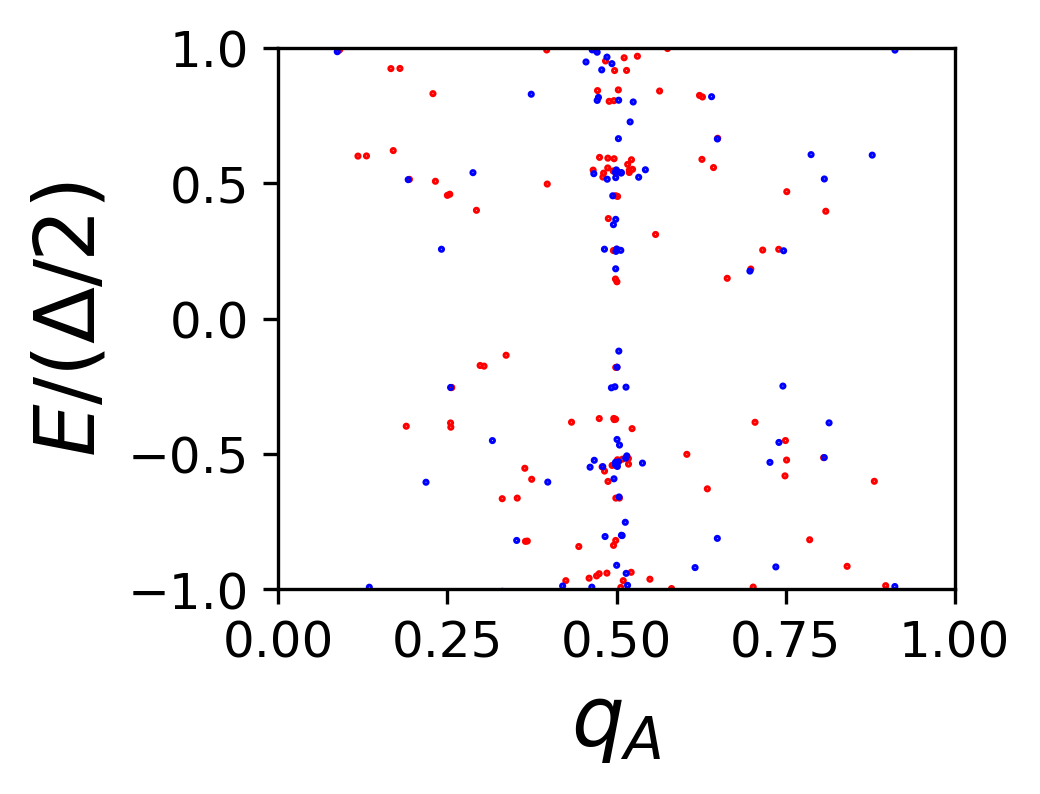

In [21]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,2,1)

list_qa_up = [compute_qA(state, Lx, Ly) for state in vec_up.transpose()]
list_qa_dn = [compute_qA(state, Lx, Ly) for state in vec_dn.transpose()]

# Disorder realizations
realization = 10
list_qa_up = []
list_qa_dn = []
list_val_up = []
list_val_dn = []
for i in range(realization):
    val_up, vec_up, val_dn, vec_dn = HF_vec(t, U, gamma, dope, Lx, Ly)
    list_qa_up.append([compute_qA(state, Lx, Ly) for state in vec_up.transpose()])
    list_qa_dn.append([compute_qA(state, Lx, Ly) for state in vec_dn.transpose()])
    list_val_up.append(val_up)
    list_val_dn.append(val_dn)


# because Mott-gap = 0.2 when U = 1
ax.scatter(list_qa_up, np.array(list_val_up)*10, s=0.5, fc='none', ec='r')
ax.scatter(list_qa_dn, np.array(list_val_dn)*10, s=0.5, fc='none', ec='b')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel(r'$q_A$', fontsize = 20)
ax.set_ylabel(r'$E/(\Delta/2)$', fontsize = 20)
ax.set_xlim(0, 1)

boudary = 1
ax.set_ylim([-boudary, boudary])
ax.set_aspect(0.4/boudary)

plt.show()